In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('spam.csv', encoding='latin-1')

data = data[['v1', 'v2']]
data.columns = ['label', 'message']

data['label'] = data['label'].map({'spam': 1, 'ham': 0})

X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=42)

vectorizer = CountVectorizer(stop_words='english')
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

new_email = ["Win a $1000 gift card now! Click here."]
new_email_transformed = vectorizer.transform(new_email)
prediction = model.predict(new_email_transformed)
print("Prediction (0=ham, 1=spam):", prediction[0])


Accuracy: 0.9832535885167464
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1453
           1       0.95      0.92      0.94       219

    accuracy                           0.98      1672
   macro avg       0.97      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Confusion Matrix:
 [[1442   11]
 [  17  202]]
Prediction (0=ham, 1=spam): 1


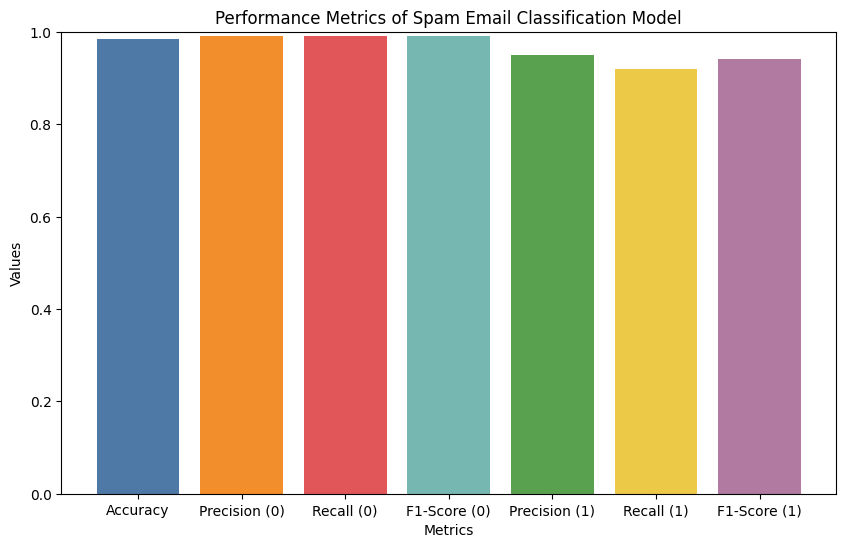

In [1]:
import matplotlib.pyplot as plt
metrics = ['Accuracy', 'Precision (0)', 'Recall (0)', 'F1-Score (0)', 'Precision (1)', 'Recall (1)', 'F1-Score (1)']
values = [
    0.9832535885167464, 
    0.99,  
    0.99,  
    0.99,  
    0.95,  
    0.92, 
    0.94  
]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color= ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', '#EDC948', '#B07AA1']
)

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)
plt.title('Performance Metrics of Spam Email Classification Model')

plt.show()
